In [1]:
!pip install mne
!pip install autoreject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import mne

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from autoreject import AutoReject, get_rejection_threshold

In [3]:
raw = mne.io.read_raw_bdf('all.bdf')


raw.info.set_montage('standard_1020')
print(raw, raw.info)

Extracting EDF parameters from /content/all.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
<RawEDF | all.bdf, 37 x 1579520 (6170.0 s), ~56 kB, data not loaded> <Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, F7, C3, T7, CP5, CP3, P5, P9, PO7, PO3, O1, Iz, POz, ...
 chs: 36 EEG, 1 Stimulus
 custom_ref_applied: False
 dig: 39 items (3 Cardinal, 36 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2023-03-07 18:20:40 UTC
 nchan: 37
 projs: []
 sfreq: 256.0 Hz
>


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


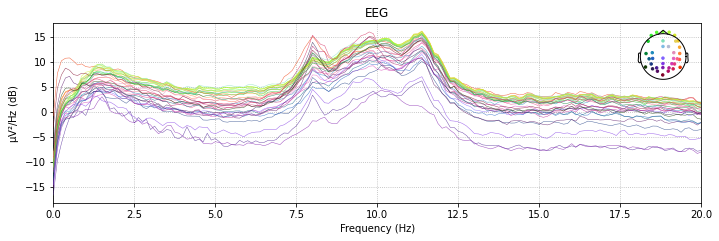

In [4]:
psd_plot = raw.plot_psd(fmax=20)
psd_plot

In [6]:
events = mne.find_events(raw)

event_id, tmin, tmax = 131071, -10.05, 0

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, preload=True)
epochs

Trigger channel has a non-zero initial value of 131071 (consider using initial_event=True to detect this event)
663 events found
Event IDs: [131071]
Not setting metadata
663 matching events found
Setting baseline interval to [-10.05078125, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 663 events and 2574 original time points ...
0 bad epochs dropped


Number of events,663
Events,131071: 663
Time range,-10.051 – 0.000 sec
Baseline,-10.051 – 0.000 sec


In [7]:
ar = AutoReject()
epochs_clean = ar.fit_transform(epochs)  

get_rejection_threshold(epochs)  

Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/36 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/663 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/663 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/663 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/663 [00:00<?,       ?it/s]

/usr/local/lib/python3.9/dist-packages/mne/bem.py:1119: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/663 [00:00<?,       ?it/s]

Dropped 211 epochs: 0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 272, 275, 276, 277, 287, 288, 289, 290, 302, 303, 304, 308, 311, 312, 313, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 533, 534, 535, 536, 537, 538, 539, 542, 543, 544, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 569, 570, 574, 575, 576, 577, 578, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 655, 657
Estimating rejecti

{'eeg': 9.87480368047608e-05}

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


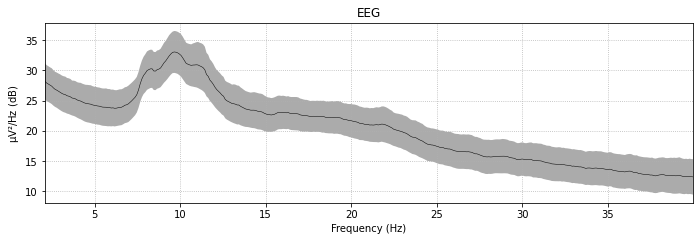

In [9]:
epochs_freq_plot = epochs_clean.plot_psd(fmin=2., fmax=40., average=True)
epochs_freq_plot

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


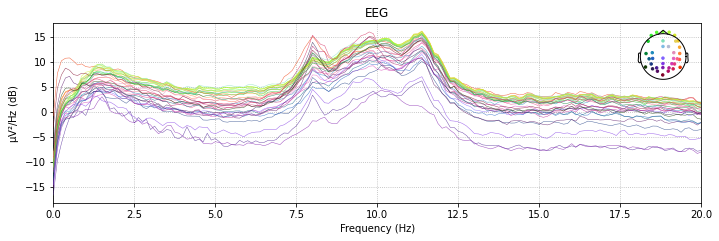

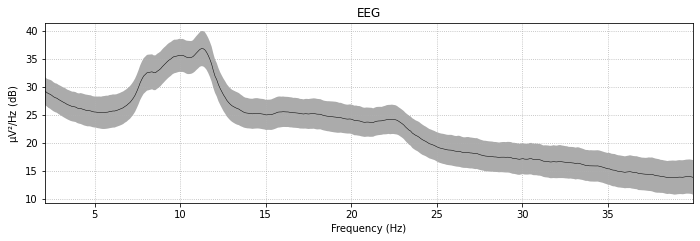

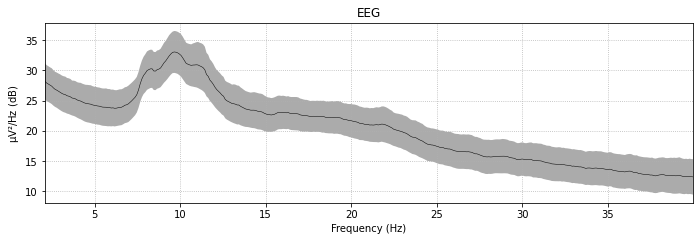

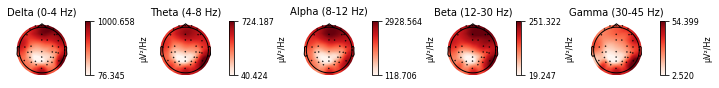

In [10]:
freq_topomaps = epochs_clean.plot_psd_topomap(ch_type='eeg', normalize=False)

No projector specified for this dataset. Please consider the method self.add_proj.


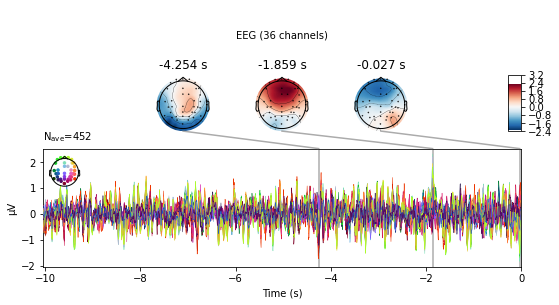

In [11]:
evoked = epochs_clean['131071'].average()
evoked_plot = evoked.plot_joint(picks='eeg')

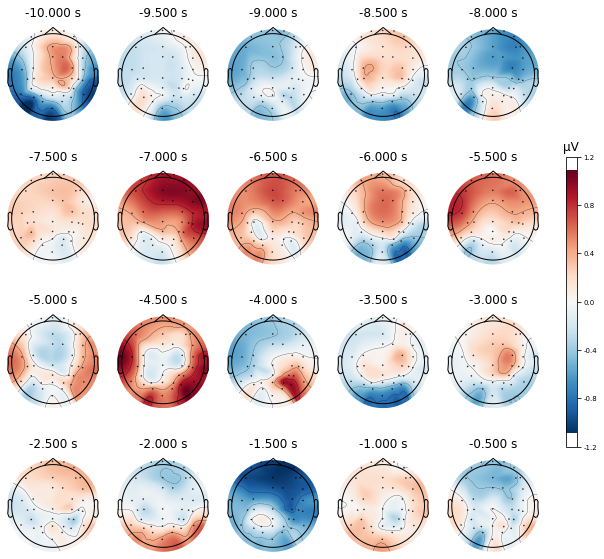

In [12]:
times = np.arange(-10, 0, 0.5)
time_segment_topomaps = evoked.plot_topomap(times, ch_type='eeg', ncols=5, nrows='auto')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.7s remaining:    0.0s


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   51.9s finished


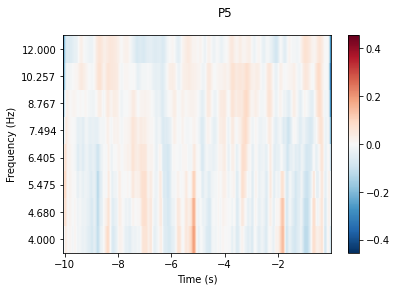

[<Figure size 432x288 with 2 Axes>]

In [15]:
frequencies = np.logspace(*np.log10([4, 12]), num=8)
cycles = frequencies / 2

power = mne.time_frequency.tfr_morlet(epochs, n_cycles=cycles, return_itc=False,freqs=frequencies, decim=3)

# Example: Channel P5
power.plot(['P5'], baseline=(-0.5, 0), mode='logratio', title = 'P5')

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


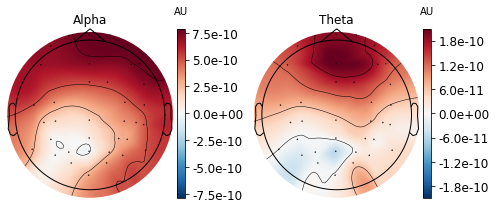

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
topomap_kw = dict(ch_type='eeg', tmin=-10, tmax=-.1, baseline=(-0.5, 0), show=False)

plot_dict = dict(Alpha=dict(fmin=8, fmax=12), Theta=dict(fmin=4, fmax=8),
                 mode='logratio', show=False)

for ax, (title, fmin_fmax) in zip(axes, plot_dict.items()):
    power.plot_topomap(**fmin_fmax, axes=ax, **topomap_kw)
    ax.set_title(title)

fig.tight_layout()
fig

In [ ]:
# Fp1 Fp2 C1 C2 P7 P8 O1 O2